# Base model
**https://www.kaggle.com/code/ammfat/facial-emotion-recognition-vgg16-fer2013/notebook**

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [4]:
# Load the trained model
model_vgg16 = load_model('/kaggle/input/my-dataset-pretrain-facial-emotion-recognition/VGG16_trainable_parameter.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [5]:
# Print the model summary to inspect the layers, input shape, and output shape
model_vgg16.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,718,281 (56.15 MB)

 Trainable params: 14,718,279 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Reading dataset (train and val) for both model

# Reading test set for both model

In [23]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import time
from tqdm import tqdm

# Định nghĩa các class
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Đường dẫn đến thư mục test
test_dir = '/kaggle/input/fer2013/test'

# Calculate performance for VGG model

In [24]:
def evaluate_class(class_folder, model):
    # Đường dẫn đến thư mục của class
    folder_path = os.path.join(test_dir, class_folder)
    
    # Lấy danh sách các file ảnh
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    correct_predictions = 0
    total_time = 0
    predictions_list = []
    
    # Xử lý từng ảnh
    for img_file in tqdm(image_files, desc=f"Processing {class_folder}"):
        img_path = os.path.join(folder_path, img_file)
        
        # Đọc và tiền xử lý ảnh
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (48, 48))
        
        # Chuyển grayscale thành RGB bằng cách stack 3 kênh
        img_rgb = np.stack((img,)*3, axis=-1)
        
        img_array = image.img_to_array(img_rgb)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize pixel values
        
        # Đo thời gian inference
        start_time = time.time()
        predictions = model.predict(img_array, verbose=0)
        end_time = time.time()
        
        total_time += (end_time - start_time)
        
        # Lấy class được dự đoán
        predicted_class = class_names[np.argmax(predictions)]
        predictions_list.append(predicted_class)
        
        # Kiểm tra dự đoán đúng
        if predicted_class == class_folder:
            correct_predictions += 1
    
    # Tính toán các metrics
    n_samples = len(image_files)
    accuracy = correct_predictions / n_samples if n_samples > 0 else 0
    avg_time = total_time / n_samples if n_samples > 0 else 0
    
    return {
        'class': class_folder,
        'n_samples': n_samples,
        'accuracy': accuracy,
        'avg_inference_time': avg_time,
        'total_time': total_time
    }


In [25]:
# Đánh giá từng class và lưu kết quả
results = []
for class_name in class_names:
    result = evaluate_class(class_name, model_vgg16)
    results.append(result)
    print(f"\nResults for {class_name}:")
    print(f"Number of samples: {result['n_samples']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Average inference time: {result['avg_inference_time']*1000:.2f} ms")

# Tính toán metrics tổng thể
total_samples = sum(r['n_samples'] for r in results)
weighted_accuracy = sum(r['accuracy'] * r['n_samples'] for r in results) / total_samples
weighted_avg_time = sum(r['total_time'] for r in results) / total_samples

print("\nOverall Results:")
print("Class-wise results:")
for r in results:
    print(f"{r['class']}: Accuracy = {r['accuracy']:.4f}, "
          f"Avg Time = {r['avg_inference_time']*1000:.2f} ms, "
          f"Samples = {r['n_samples']}")

print(f"\nWeighted Average Accuracy: {weighted_accuracy:.4f}")
print(f"Average Inference Time per Image: {weighted_avg_time*1000:.2f} ms")

# Tạo DataFrame để hiển thị kết quả
results_df = pd.DataFrame(results)
print("\nDetailed Results DataFrame:")
print(results_df)

Processing angry: 100%|██████████| 958/958 [01:08<00:00, 14.08it/s]



Results for angry:
Number of samples: 958
Accuracy: 0.8100
Average inference time: 64.79 ms


Processing disgust: 100%|██████████| 111/111 [00:07<00:00, 13.96it/s]



Results for disgust:
Number of samples: 111
Accuracy: 0.9009
Average inference time: 65.65 ms


Processing fear: 100%|██████████| 1024/1024 [01:14<00:00, 13.83it/s]



Results for fear:
Number of samples: 1024
Accuracy: 0.7539
Average inference time: 66.48 ms


Processing happy: 100%|██████████| 1774/1774 [02:10<00:00, 13.64it/s]



Results for happy:
Number of samples: 1774
Accuracy: 0.9566
Average inference time: 67.66 ms


Processing sad: 100%|██████████| 1247/1247 [01:31<00:00, 13.69it/s]



Results for sad:
Number of samples: 1247
Accuracy: 0.7506
Average inference time: 67.34 ms


Processing surprise: 100%|██████████| 831/831 [01:02<00:00, 13.35it/s]



Results for surprise:
Number of samples: 831
Accuracy: 0.8809
Average inference time: 67.98 ms


Processing neutral: 100%|██████████| 1233/1233 [01:31<00:00, 13.44it/s]


Results for neutral:
Number of samples: 1233
Accuracy: 0.8597
Average inference time: 67.39 ms

Overall Results:
Class-wise results:
angry: Accuracy = 0.8100, Avg Time = 64.79 ms, Samples = 958
disgust: Accuracy = 0.9009, Avg Time = 65.65 ms, Samples = 111
fear: Accuracy = 0.7539, Avg Time = 66.48 ms, Samples = 1024
happy: Accuracy = 0.9566, Avg Time = 67.66 ms, Samples = 1774
sad: Accuracy = 0.7506, Avg Time = 67.34 ms, Samples = 1247
surprise: Accuracy = 0.8809, Avg Time = 67.98 ms, Samples = 831
neutral: Accuracy = 0.8597, Avg Time = 67.39 ms, Samples = 1233

Weighted Average Accuracy: 0.8461
Average Inference Time per Image: 67.01 ms

Detailed Results DataFrame:
      class  n_samples  accuracy  avg_inference_time  total_time
0     angry        958  0.810021            0.064785   62.064305
1   disgust        111  0.900901            0.065652    7.287322
2      fear       1024  0.753906            0.066479   68.073997
3     happy       1774  0.956595            0.067661  120.030378

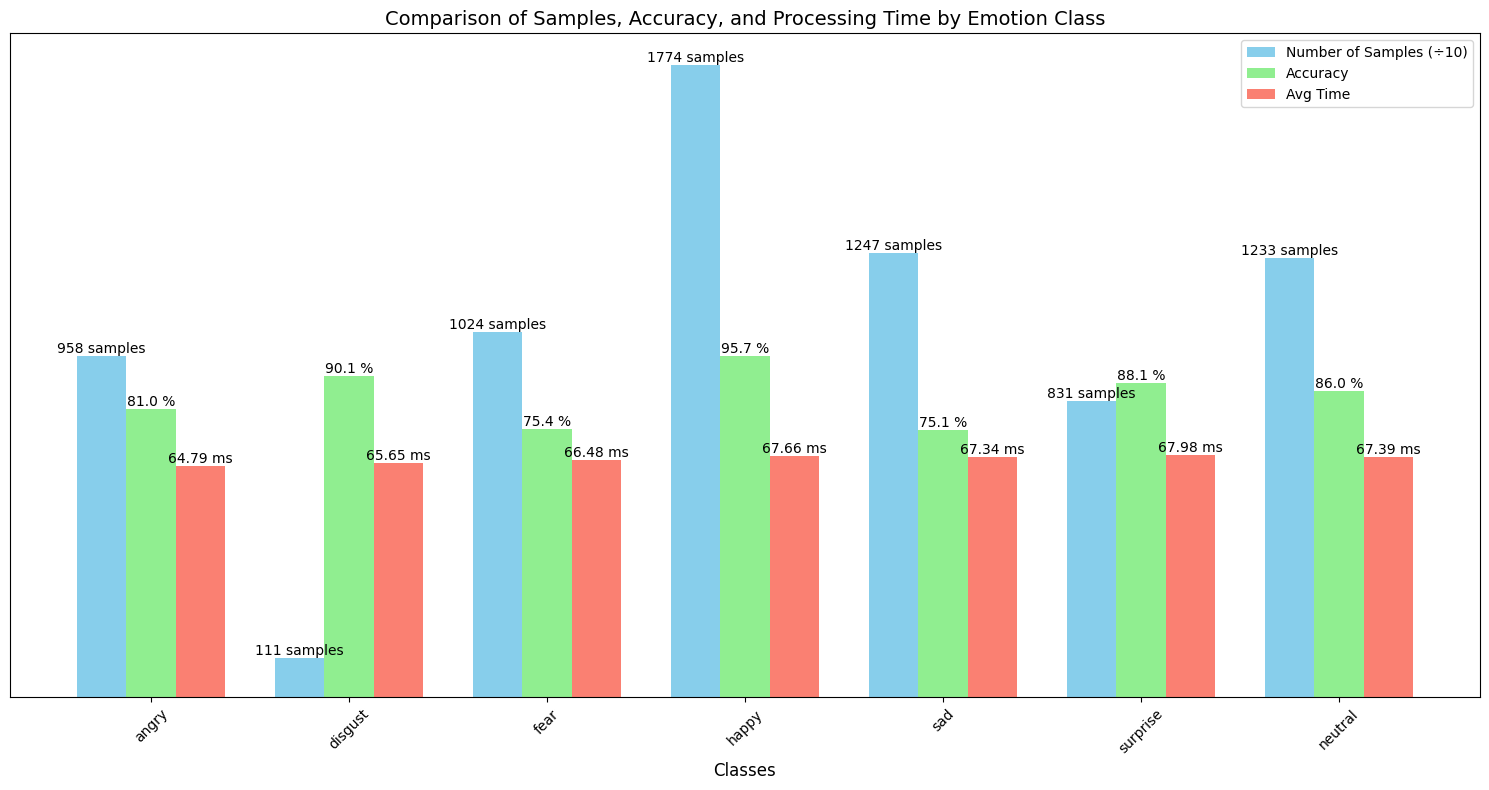

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Chuẩn bị dữ liệu
classes = results_df['class']
n_samples = results_df['n_samples'] / 10  # Scale down số lượng mẫu
accuracies = results_df['accuracy'] * 100
avg_times = results_df['avg_inference_time'] * 1000

# Tạo vị trí cho các cột
x = np.arange(len(classes))
width = 0.25

# Tạo figure
plt.figure(figsize=(15, 8))

# Tạo các cột
bars1 = plt.bar(x - width, n_samples, width, label='Number of Samples (÷10)', color='skyblue')
bars2 = plt.bar(x, accuracies, width, label='Accuracy', color='lightgreen')
bars3 = plt.bar(x + width, avg_times, width, label='Avg Time', color='salmon')

# Thêm giá trị và đơn vị lên từng cột
def autolabel(bars, values, format_str):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                format_str.format(val),
                ha='center', va='bottom')

# Hiển thị giá trị gốc (chưa scale) cho số lượng mẫu
autolabel(bars1, results_df['n_samples'], '{:.0f} samples')
autolabel(bars2, accuracies, '{:.1f} %')
autolabel(bars3, avg_times, '{:.2f} ms')

# Tùy chỉnh đồ thị
plt.xlabel('Classes', fontsize=12)
plt.title('Comparison of Samples, Accuracy, and Processing Time by Emotion Class', fontsize=14)
plt.xticks(x, classes, rotation=45)
plt.legend()

# Xóa label trục y và ẩn các đường kẻ của trục y
plt.ylabel('')
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Thêm grid để dễ đọc (chỉ theo chiều ngang)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Tự động điều chỉnh layout
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

# Define my model

## 1. Reading training set

**This training set used for both VGG model and my model**<br>
**You can read the training VGG model notebook here 'https://www.kaggle.com/code/ammfat/facial-emotion-recognition-vgg16-fer2013/notebook'**

In [3]:
import math
import numpy as np
import pandas as pd

import cv2
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
df = pd.read_csv('/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
df =df[['emotion','pixels']]
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [7]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
counts = df.emotion.value_counts()
# Tạo Series value_counts
counts = df.emotion.value_counts()

# Tạo DataFrame mới với index từ 0-6
count_df = pd.DataFrame({
    'label': [emotion_label_to_text[i] for i in range(7)],
    'count': [counts.get(i, 0) for i in range(7)]
})

# Thêm cột index
count_df.index.name = 'index'

# Hiển thị bảng
print(count_df)

           label  count
index                  
0          anger   4953
1        disgust    547
2           fear   5121
3      happiness   8989
4        sadness   6077
5       surprise   4002
6        neutral   6198


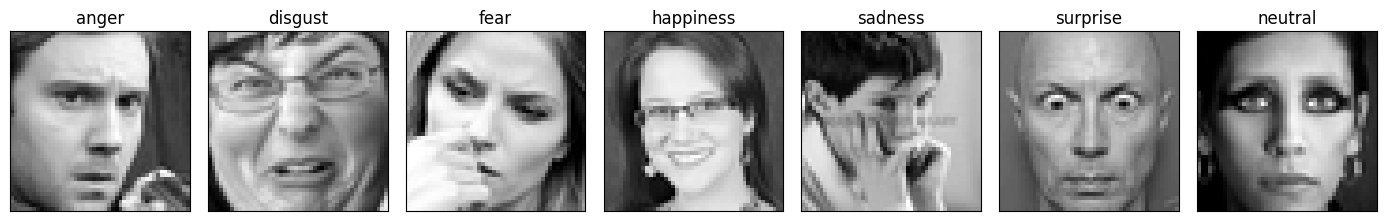

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def plot_one_image_per_emotion(df, emotion_label_to_text):
    fig = plt.figure(figsize=(14, 14))
    unique_labels = sorted(df.emotion.unique())  # Lấy tất cả nhãn unique

    for i, label in enumerate(unique_labels, 1):  # Duyệt từng nhãn, bắt đầu index từ 1
        # Lấy ảnh đầu tiên của mỗi nhãn
        px = df[df.emotion == label].pixels.iloc[0]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        ax = fig.add_subplot(7, 7, i)  # Thêm subplot vào vị trí i
        ax.imshow(px, cmap='gray')     # Hiển thị ảnh
        ax.set_xticks([])              # Bỏ ticks x
        ax.set_yticks([])              # Bỏ ticks y
        ax.set_title(emotion_label_to_text[label])  # Đặt tiêu đề theo nhãn

    plt.tight_layout()
    plt.show()
plot_one_image_per_emotion(df, emotion_label_to_text)

In [17]:
type(df['pixels'][1])

str

In [72]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis = 0)
img_array.shape

(35887, 48, 48)

In [ ]:
img_features = []

for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)

img_features = np.array(img_features)
img_array = img_features
print(img_features.shape)

(35887, 48, 48, 3)


In [42]:
print(df['emotion'].shape)

(35887,)


In [41]:
type(img_array)

numpy.ndarray

## 2. Train/val split

In [43]:
X = img_array
y = df['emotion'].values

In [54]:
type(X)

numpy.ndarray

In [55]:
type(y)

numpy.ndarray

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:

print(f"Train set shape: \n X: {X_train.shape} \n y: {y_train.shape}")
print(f"Validation set shape: \n X: {X_val.shape}\n y: {y_val.shape}")

Train set shape: 
 X: (28709, 48, 48, 3) 
 y: (28709,)
Validation set shape: 
 X: (7178, 48, 48, 3)
 y: (7178,)


In [59]:
print(X_train[0,:,:,:])

[[[107. 107. 107.]
  [128. 128. 128.]
  [139. 139. 139.]
  ...
  [104. 104. 104.]
  [115. 115. 115.]
  [ 89.  89.  89.]]

 [[102. 102. 102.]
  [134. 134. 134.]
  [149. 149. 149.]
  ...
  [107. 107. 107.]
  [ 98.  98.  98.]
  [ 90.  90.  90.]]

 [[107. 107. 107.]
  [133. 133. 133.]
  [156. 156. 156.]
  ...
  [ 88.  88.  88.]
  [ 94.  94.  94.]
  [ 97.  97.  97.]]

 ...

 [[255. 255. 255.]
  [251. 251. 251.]
  [201. 201. 201.]
  ...
  [219. 219. 219.]
  [224. 224. 224.]
  [224. 224. 224.]]

 [[246. 246. 246.]
  [250. 250. 250.]
  [248. 248. 248.]
  ...
  [237. 237. 237.]
  [237. 237. 237.]
  [232. 232. 232.]]

 [[253. 253. 253.]
  [252. 252. 252.]
  [247. 247. 247.]
  ...
  [240. 240. 240.]
  [239. 239. 239.]
  [236. 236. 236.]]]


In [60]:
X_train = X_train / 255.
X_val = X_val / 255.

In [61]:
print(X_train[0,:,:,:])

[[[0.41960785 0.41960785 0.41960785]
  [0.5019608  0.5019608  0.5019608 ]
  [0.54509807 0.54509807 0.54509807]
  ...
  [0.40784314 0.40784314 0.40784314]
  [0.4509804  0.4509804  0.4509804 ]
  [0.34901962 0.34901962 0.34901962]]

 [[0.4        0.4        0.4       ]
  [0.5254902  0.5254902  0.5254902 ]
  [0.58431375 0.58431375 0.58431375]
  ...
  [0.41960785 0.41960785 0.41960785]
  [0.38431373 0.38431373 0.38431373]
  [0.3529412  0.3529412  0.3529412 ]]

 [[0.41960785 0.41960785 0.41960785]
  [0.52156866 0.52156866 0.52156866]
  [0.6117647  0.6117647  0.6117647 ]
  ...
  [0.34509805 0.34509805 0.34509805]
  [0.36862746 0.36862746 0.36862746]
  [0.38039216 0.38039216 0.38039216]]

 ...

 [[1.         1.         1.        ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.7882353  0.7882353  0.7882353 ]
  ...
  [0.85882354 0.85882354 0.85882354]
  [0.8784314  0.8784314  0.8784314 ]
  [0.8784314  0.8784314  0.8784314 ]]

 [[0.9647059  0.9647059  0.9647059 ]
  [0.98039216 0.98039216 0.98039216]


## 3. Define model

In [51]:
emotion_label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

### Version 1

In [52]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Tải mô hình ResNet-50 với các trọng số đã được huấn luyện trước trên ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
num_classes =len(emotion_label_to_text)

# Thêm các lớp đầu ra phù hợp với bài toán của bạn
x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)  # New layer
x = Dense(256, activation='relu')(x)  # New layer
x = Dense(128, activation='relu')(x)  # New layer
x = Dense(32, activation='relu')(x)  # New layer

predictions = Dense(num_classes, activation='softmax')(x)  # num_classes là số lượng cảm xúc

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=predictions)

# Đóng băng các lớp của mô hình gốc để không huấn luyện lại chúng
for layer in base_model.layers:
    layer.trainable = False

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In cấu trúc mô hình
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 26,379,271 (100.63 MB)

 Trainable params: 2,791,559 (10.65 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [70]:
import numpy as np
import tensorflow as tf
# Chuyển đổi nhãn y thành dạng one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# Tạo TensorFlow Dataset từ numpy arrays
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
print(train_dataset.shape)
print(val_dataset).shape

AttributeError: '_TensorSliceDataset' object has no attribute 'shape'

In [68]:
history = model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=10)

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.